In [2]:
#Importing required libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
# import matplotlib

# %matplotlib qt

In [4]:
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/results_w50_15dp',]
# Define folder labels
folder_labels = [50]

In [6]:
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_.*\.txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            #df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5])
            
            # Remove duplicates
            df = df.drop_duplicates()
            
            # Only getting the ones at equilibrium
            df = df[df['Iteration_Number'] == 99999]
            
            # Add 'simulation' and 'folder_label' columns
            df['Simulation'] = filename
            df['Environment'] = folder_labels[i]
            
            # Append the modified DataFrame to the list
            dataframes.append(df)

# Concatenate all data in a pandas dataframe
combined_df = pd.concat(dataframes, ignore_index=True)


In [7]:
combined_df.to_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50_megabatch/w50_15dp_equilibrium_species_richness.csv')

    Number_of_Simulations     avg_sr
0                      50  57.620000
1                     150  62.946667
2                     250  56.392000
3                     350  55.725714
4                     450  57.866667
5                     550  55.987273
6                     650  59.078462
7                     750  59.069333
8                     850  57.072941
9                     950  59.161053
10                   1050  58.004762
11                   1150  56.169565
12                   1250  56.475200
13                   1350  57.795556
14                   1450  57.414483
15                   1550  58.054839
16                   1650  58.634545
17                   1750  58.418857
18                   1850  58.094595
19                   1950  57.882564
20                   2050  58.544878
21                   2150  58.743256
22                   2250  58.449333
23                   2350  58.815745
24                   2450  59.332653
25                   2550  58.396863
2

Text(0, 0.5, 'Average Species Richness')

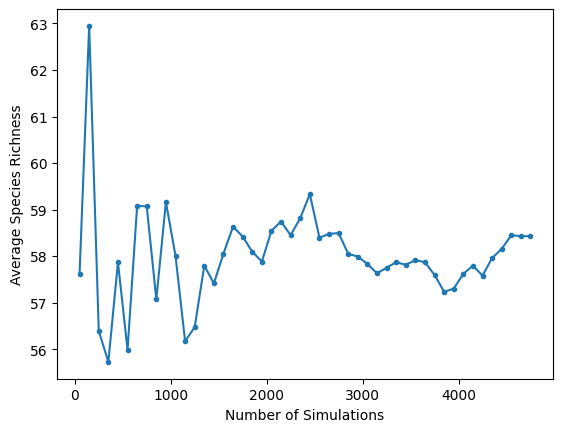

In [8]:
# Generate a list to store the average values
average_values = []

# Iterate over increasing number of simulations
for i in range(50, 4844, 100):
    # Calculate the average value of X for the first i simulations
    avg_sr = combined_df.head(i)['Species_Count'].mean()
    # Append the average value to the list
    average_values.append(avg_sr)

# Create a DataFrame from the list of average values
avg_df = pd.DataFrame({'Number_of_Simulations': range(50, 4844, 100), 'avg_sr': average_values})

print(avg_df)
plt.plot(avg_df['Number_of_Simulations'], avg_df['avg_sr'], marker='o', markersize=3)
plt.xlabel('Number of Simulations')
plt.ylabel('Average Species Richness')

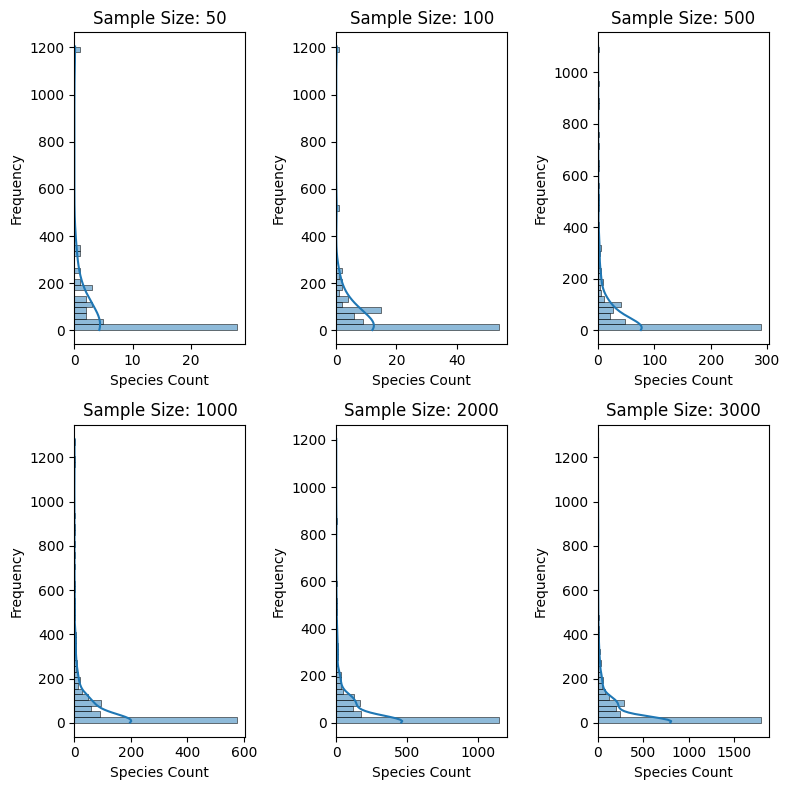

In [34]:
# Sample sizes to use
sample_sizes = [50, 100, 500, 1000, 2000, 3000]

# Create the grid of subplots
num_plots = len(sample_sizes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,8))
axes = axes.flatten()

# Loop through sample sizes
for i, size in enumerate(sample_sizes):
    # Take a random sample from the DataFrame
    sample_df = combined_df.sample(n=size)
    
    # Create histogram on the corresponding subplot
    ax = axes[i]
    sns.histplot(data=sample_df, y='Species_Count',  ax=ax, kde=True, bins=50)
    ax.set_title(f'Sample Size: {size}')
    ax.set_xlabel('Species Count')
    ax.set_ylabel('Frequency')
   

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
